<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/3d_open_matrix_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
import pandas as pd

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz


---
##  Plot 3d: Global Config

In [0]:
cube_range = (0, 13)

figure_size = (24,20)
plot_layout = (2, 1)
teta_view = 170
phi_view = 77

##  Plot 3d: Global Config - Elétrico

In [0]:
elc_global_scale = (10, -60)
elc_private_scale = ( 0, -70)

elc_zLim = (-70, 10)

elc_cube_range = cube_range

elc_figure_size = figure_size
elc_plot_layout = plot_layout
elc_teta_view = teta_view
elc_phi_view = phi_view

##  Plot 3d: Global Config - Magnético

In [0]:
mag_global_scale = (10, -60)
mag_private_scale = ( -25, -60)

mag_zLim = (-60, -25)

mag_cube_range = cube_range

mag_figure_size = figure_size
mag_plot_layout = plot_layout
mag_teta_view = teta_view
mag_phi_view = phi_view

---
## Interpolate Global Config

In [0]:
s = 400
ratio = 10
antialiased = True

elc_s = s
elc_ratio = ratio
elc_antialiased = antialiased

mag_s = 250
mag_ratio = ratio
mag_antialiased = antialiased

---
##  Plot 3d: Top - 500  KHz - Elétrico

In [0]:
pd_elc_plane_top_500_KHz

In [0]:
Z=elc_plane_top_500_KHz

In [0]:
Z=Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_global_scale[0],
                       vmin = elc_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Bottom - 500  KHz  - Elétrico

In [0]:
pd_elc_plane_bottom_500_KHz

In [0]:
Z = elc_plane_bottom_500_KHz

In [0]:
Z=Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_global_scale[0],
                       vmin = elc_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Top - 24  MHz  - Elétrico

In [0]:
pd_elc_plane_top_24_MHz

In [0]:
Z = elc_plane_top_24_MHz

In [0]:
Z=Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_global_scale[0],
                       vmin = elc_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Bottom - 24  MHz  - Elétrico

In [0]:
pd_elc_plane_bottom_24_MHz

In [0]:
Z = elc_plane_bottom_24_MHz

In [0]:
Z=Z[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_global_scale[0],
                       vmin = elc_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(elc_zLim[0], elc_zLim[1])

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Top - 24  MHz  - Magnético

In [0]:
pd_mag_plane_top_24_MHz

In [0]:
Z = mag_plane_top_24_MHz

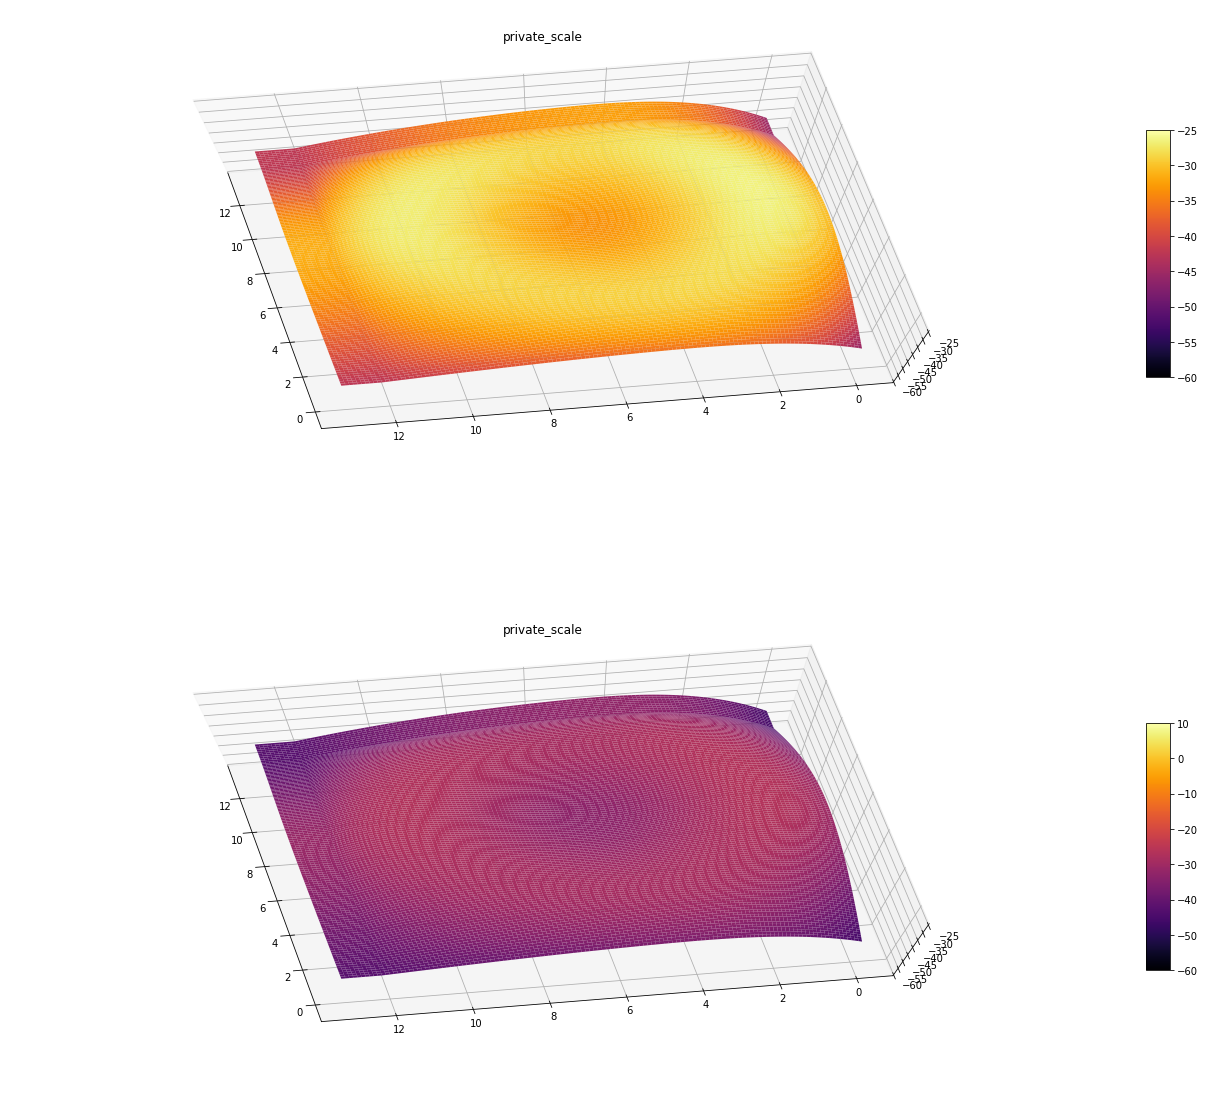

In [20]:
Z=Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:ratio*cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,mag_cube_range[0]], Y_interp[mag_cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_private_scale[0],
                       vmin = mag_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(mag_zLim[0], mag_zLim[1])

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,mag_cube_range[0]], Y_interp[mag_cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_global_scale[0],
                       vmin = mag_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(mag_zLim[0], mag_zLim[1])

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Bottom - 24  MHz Magnético

In [21]:
pd_mag_plane_bottom_24_MHz

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,43.02,39.90,37.67,35.39,33.19,31.33,31.25,31.62,33.66,35.54,38.12,40.41,43.66
1,39.93,37.23,34.78,32.52,30.49,28.87,28.97,30.68,32.44,31.71,33.17,35.63,41.02
2,38.26,35.77,33.17,31.16,29.16,27.89,27.64,27.91,29.30,31.93,33.91,35.81,40.03
3,36.24,33.60,32.10,30.32,28.76,28.18,32.20,27.11,27.90,29.50,31.62,34.90,39.40
4,35.60,33.76,31.74,29.69,28.70,30.00,34.30,27.40,27.20,29.09,31.00,33.20,38.40
5,34.83,32.50,30.26,28.52,27.64,30.30,42.60,28.87,27.86,28.94,30.80,33.50,37.15
6,34.76,32.65,30.55,28.65,28.13,31.16,47.60,29.10,28.13,28.70,31.16,33.50,36.96
7,35.20,32.97,30.59,28.70,27.30,29.80,39.90,28.49,27.50,28.50,30.11,33.50,37.80
8,35.70,33.15,31.20,29.14,27.80,29.15,34.15,27.50,27.50,28.83,30.60,33.40,37.50
9,37.50,34.20,31.70,29.80,27.50,25.70,29.50,27.17,27.50,29.70,31.80,34.60,39.10


In [0]:
Z = mag_plane_bottom_24_MHz

In [0]:
Z=Z[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1, projection='3d')
ax.set_title('private_scale')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:ratio*cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,mag_cube_range[0]], Y_interp[mag_cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_private_scale[0],
                       vmin = mag_private_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(mag_zLim[0], mag_zLim[1])

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2, projection='3d')
ax.set_title('private_scale')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,mag_cube_range[0]], Y_interp[mag_cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_global_scale[0],
                       vmin = mag_global_scale[1])

fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim(mag_zLim[0], mag_zLim[1])

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
plt.show()